# Generate PCA Data

This notebook is used to generate a set of PCA data that can be used in downstream machine learning steps

## Library Import and Data Loading

In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import scanpy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import loompy

from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
# Set ScanPy options
sp.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sp.logging.print_header()
sp.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.5.2 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0


In [3]:
# Load the data set
cells = sp.read_h5ad("data/cells.h5ad")
cells

AnnData object with n_obs × n_vars = 50435 × 22956
    obs: 'CellFromTumor', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'nGene', 'nUMI', 'orig_ident', 'percent_mito', 'percent_ribo', 'seurat_clusters', 'tissue', 'type'
    var: 'Selected', 'detection_rate', 'gmean', 'residual_mean', 'residual_variance', 'variance'
    uns: 'seurat_clusters_colors', 'type_colors'
    obsm: 'X_umap', 'pca_cell_embeddings', 'umap_cell_embeddings'
    varm: 'pca_feature_loadings'
    layers: 'norm_data'

## Getting original PCA data and splitting into train and test sets

Text(0.5, 1.0, 'Distribution of Cell Types in Complete Data Set')

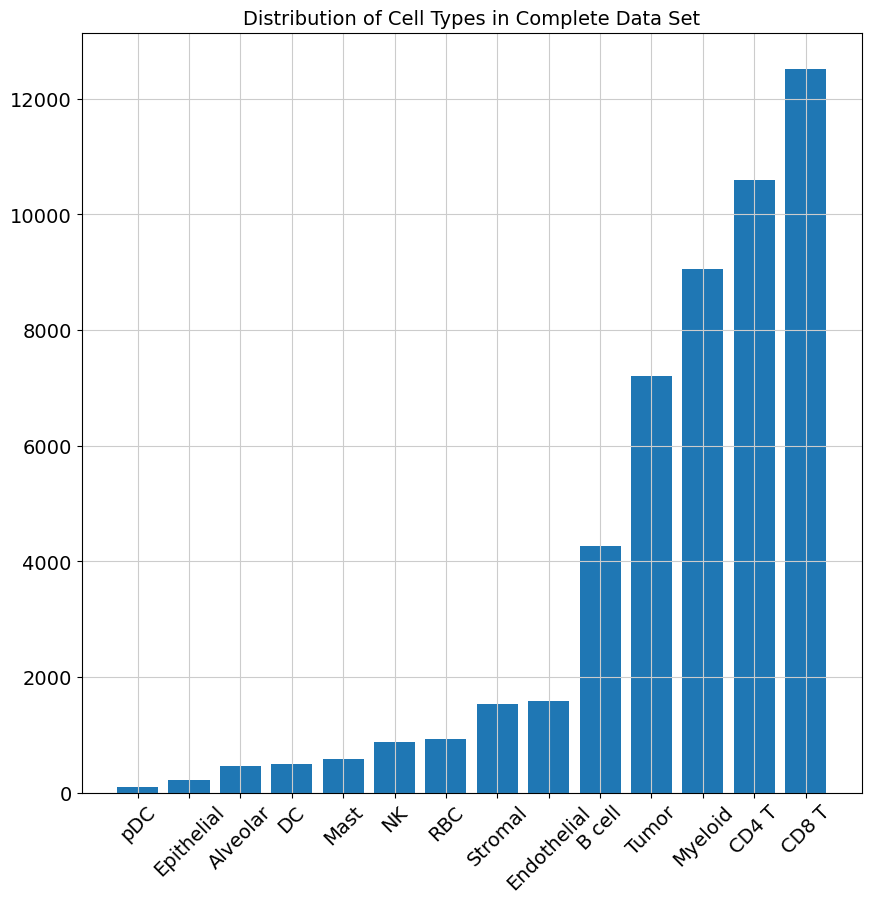

In [26]:
# Plot the distribution of cell types in the original data set
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(cells.obs['type'].value_counts().sort_values().index, sorted(cells.obs['type'].value_counts()))
plt.xticks(rotation=45, ha="center")
plt.title("Distribution of Cell Types in Complete Data Set")

In [9]:
# Pull out the Seurat PCA embeddings
df = pd.DataFrame(cells.obsm["pca_cell_embeddings"], columns=["PC_{}".format(i) for i in range(1, 51)], index=cells.obs_names)
cell_types = cells.obs['type']
df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
CellID,,,,,,,,,,,,,,,,,,,,,
AAACATACCTGAGT_1,3.228240,-1.442282,0.010687,-0.012878,-0.023222,1.041812,3.233714,-2.113360,-3.087088,-0.830693,...,-0.185144,-1.494498,1.926856,0.278862,-0.429777,0.688598,0.119311,0.493696,-0.475975,-0.257505
AAAGAGACATCGTG_1,3.433098,-2.105733,-0.014016,-0.145679,-0.399205,0.169243,2.959189,-2.190532,-3.402277,-1.254167,...,-1.294103,-1.510427,3.153297,-0.039221,-1.523690,0.573772,0.067953,1.007895,-0.086702,0.149674
AACGCATGCTTAGG_1,0.789058,0.623607,-0.496383,-0.122299,1.019418,0.325117,3.056746,-1.189818,-3.331354,-1.189743,...,0.248214,-1.535190,3.208787,0.529924,1.327128,-0.579244,0.003387,-0.917640,-0.153554,-0.641653
AACTGTCTTGACAC_1,3.265859,-1.945177,-0.542914,-0.761988,-0.068410,0.522635,2.073579,-1.002115,-4.944394,-2.015224,...,-0.053403,0.004582,0.459797,0.165478,0.490519,-0.730548,0.238770,-0.526224,0.762669,-0.213823
AAGAATCTCATGAC_1,2.422005,-1.463805,0.897981,0.515453,0.094406,1.366363,3.539258,-1.332522,-4.969215,-1.806276,...,0.569707,-2.132128,3.221702,0.551232,-1.739022,-0.211421,0.046571,-0.617582,1.021335,0.282042


In [27]:
# Now we can split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, cell_types, random_state=RANDOM_SEED, stratify=cell_types, test_size=0.2)

In [28]:
# Write the data out into CSV files
X_train_csv = "data/X_train_Seurat_PCA.csv"
X_test_csv = "data/X_test_Seurat_PCA.csv"
X_train.to_csv(X_train_csv)
X_test.to_csv(X_test_csv)
y_train_csv = "data/y_train_Seurat_PCA.csv"
y_test_csv = "data/y_test_Seurat_PCA.csv"
y_train.to_csv(y_train_csv)
y_test.to_csv(y_test_csv)

## Generate Multiple PCA's for Downstream Analysis

In [30]:
n_PCs = [10, 25, 50, 100, 150, 200, 300]

In [31]:
# Get the raw counts for all cells
df = pd.DataFrame(cells.X, columns=cells.var_names, index=cells.obs_names)
cell_types = cells.obs['type']

In [34]:
# Now we can split the data set into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(df, cell_types, random_state=RANDOM_SEED, stratify=cell_types, test_size=0.2)

In [35]:
# Write the training and test dataframes to files as they will be easier to work with downstream when using Scanpy
X_train_csv = "data/X_train_RAW.csv"
X_test_csv = "data/X_test_RAW.csv"
X_train.to_csv(X_train_csv)
X_test.to_csv(X_test_csv)
# Write out the training and test labels so they can be easily loaded in the future if we want to create other notebooks for testing different algorithms
y_train_csv = "data/y_train_RAW.csv"
y_test_csv = "data/y_test_RAW.csv"
y_train.to_csv(y_train_csv)
y_test.to_csv(y_test_csv)

In [42]:
def process_PCA(input_file, output_file, nPC):
    # Create an anndata object for the subsetted data frame
    anndata = sp.read_csv(input_file)
    # Filter genes that have abnormally low expression
    sp.pp.filter_genes(anndata, min_cells=3)
    # Count normalize
    sp.pp.normalize_total(anndata, target_sum=1e4)
    # Log transform the data
    sp.pp.log1p(anndata)
    # Detect the highly variable genes in the data set
    sp.pp.highly_variable_genes(anndata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    # Freeze the state of the anndata object
    anndata.raw = anndata
    # Scale each gene to unit variance
    anndata = anndata[:, anndata.var.highly_variable]
    sp.pp.scale(anndata, max_value=10)
    # Do PCA
    sp.tl.pca(anndata, n_comps=nPC, random_state=RANDOM_SEED)
    # Now we pull out the number of PC's and use that when fitting our models
    anndata_pca = pd.DataFrame(anndata.obsm['X_pca'], columns=["PC_{}".format(i) for i in range(1,(nPC + 1))], index=anndata.obs_names)
    # Write the PCA data out to CSV files so they can be easily loaded in different notebooks
    anndata_pca.to_csv(output_file)

In [43]:
for nPC in n_PCs:
    for item in {"train": X_train_csv, "test": X_test_csv}.items():
        print("Calculating PCA for {} set using {} with {} PC's".format(item[0], item[1], nPC))
        process_PCA(item[1], "data/X_{}_{}_PCs.csv".format(item[0], nPC), nPC)

Calculating PCA for train set using data/X_train_RAW.csv with 10 PC's


filtered out 2510 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:02)
extracting highly variable genes
    finished (0:00:12)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=10
    finished (0:00:03)


Calculating PCA for test set using data/X_test_RAW.csv with 10 PC's


filtered out 5530 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=10
    finished (0:00:01)


Calculating PCA for train set using data/X_train_RAW.csv with 25 PC's


filtered out 2510 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:02)
extracting highly variable genes
    finished (0:00:10)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=25
    finished (0:00:05)


Calculating PCA for test set using data/X_test_RAW.csv with 25 PC's


filtered out 5530 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=25
    finished (0:00:02)


Calculating PCA for train set using data/X_train_RAW.csv with 50 PC's


filtered out 2510 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:03)
extracting highly variable genes
    finished (0:00:12)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:11)


Calculating PCA for test set using data/X_test_RAW.csv with 50 PC's


filtered out 5530 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


Calculating PCA for train set using data/X_train_RAW.csv with 100 PC's


filtered out 2510 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:02)
extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:16)


Calculating PCA for test set using data/X_test_RAW.csv with 100 PC's


filtered out 5530 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:07)


Calculating PCA for train set using data/X_train_RAW.csv with 150 PC's


filtered out 2510 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:01)
extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=150
    finished (0:00:32)


Calculating PCA for test set using data/X_test_RAW.csv with 150 PC's


filtered out 5530 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=150
    finished (0:00:12)


Calculating PCA for train set using data/X_train_RAW.csv with 200 PC's


filtered out 2510 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:01)
extracting highly variable genes
    finished (0:00:10)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=200
    finished (0:00:35)


Calculating PCA for test set using data/X_test_RAW.csv with 200 PC's


filtered out 5530 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=200
    finished (0:00:16)


Calculating PCA for train set using data/X_train_RAW.csv with 300 PC's


filtered out 2510 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:01)
extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=300
    finished (0:00:52)


Calculating PCA for test set using data/X_test_RAW.csv with 300 PC's


filtered out 5530 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    on highly variable genes
    with n_comps=300
    finished (0:00:23)
